# Tutorial for the package decorations, based in Matplotlib

Motivation for creating **Decorations** Many students and researchers often create numerous test plots using basic Matplotlib settings, later spending time beautifying them before submitting for assignments or feedback. The decorations package addresses this issue by providing pre-configured plotting settings that produce aesthetically pleasing visuals from the start.

This package not only streamlines the plotting process, allowing for immediate use of high-quality graphics, but also retains flexibility for customization, ensuring that users can tailor their plots to meet specific needs. Enjoy!

In [1]:
from decorations import load_plot_settings, error_bar_settings

## Using the **load_plot_settings** Function

In this example, we'll demonstrate how to use the **decorations** package to create a plot with error bars and residuals. We'll make use of gridspec for multi-panel plots as well!


In [2]:
# Default parameters for load_plot_settings function
# Feel free to customize these values according to your specific plotting needs

load_plot_settings(
    fontsize=10,  # Font size for text in plots (default is 10, adjust as needed)
    figsize=(3.5, 3.5),  # Figure size (default is 3.5x3.5 for two-column figures)
    dpi=175,  # Dots per inch for plot resolution (higher values result in better quality)
    
    # Colors for cycling through data points
    # Use a custom list for your own palette, or leave as None to use the default color-blind friendly palette
    colors=None,  # Example: ['#4477AA', '#EE6677', '#228833', '#CCBB44', '#66CCEE', '#AA3377', '#BBBBBB']
    
    # Markers for plotting
    # Use a custom list for different marker shapes, or leave as None to use the default set
    markers=None,  # Example: ['o', 's', '^', 'v', 'D', 'P', 'X']
    
    latex=True  # Set to True to enable LaTeX formatting for text; set to False for plain text
)


Hi edgar839, you have imported plooting decorations. 
    Note: 
    Figsize = (3.5, 3.5) for coloumn figures
    Fontsize: 10
    Colorblind Pallet: ['#4477AA', '#EE6677', '#228833', '#CCBB44', '#66CCEE', '#AA3377', '#BBBBBB']
    Marker: ['o', 's', '^', 'v', 'D', 'P', 'X']
    Cheers!


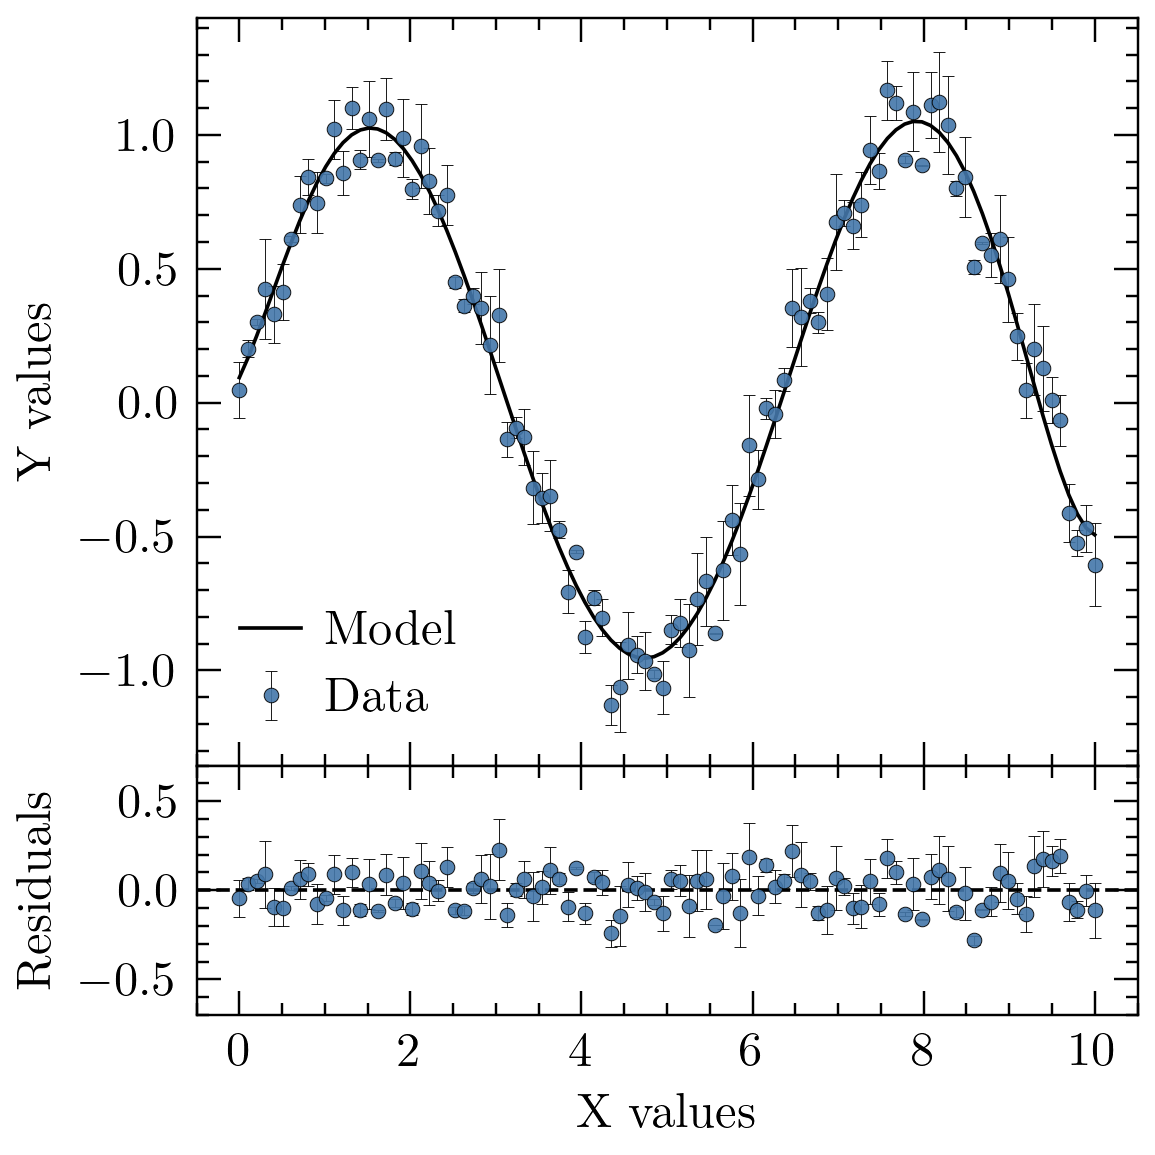

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

# Generate some test data (sine wave with noise)
x = np.linspace(0, 10, 100)
y_data = np.sin(x) + 0.1 * np.random.normal(size=x.size)  # Noisy sine wave
yerr = 0.2 * np.random.uniform(low=0, high = 1,size=x.size)
y_model = np.polyval(np.polyfit(x, y_data, 6), x)  # Polynomial fit as a model

# Calculate residuals
residuals = y_data - y_model

# Create the figure and grid spec
fig = plt.figure()
gs = gridspec.GridSpec(2, 1, height_ratios=[3, 1],hspace= 0)  # 3:1 ratio for top and bottom panels

# Top panel: data and model
ax1 = fig.add_subplot(gs[0])
ax1.errorbar(x, y_data, yerr = yerr, **error_bar_settings, label="Data")  # Plot data
ax1.plot(x, y_model, 'k-', label="Model")  # Plot model
ax1.legend()
ax1.set_ylabel("Y values")

# Remove tick labels from the upper x-axis
ax1.tick_params(axis='x', which='both', labelbottom=False)

# Bottom panel: residuals
ax2 = fig.add_subplot(gs[1])
ax2.errorbar(x, residuals,yerr =yerr, **error_bar_settings)  # Plot residuals
ax2.axhline(0, color='k', linestyle='--')  # Zero line for residuals
ax2.set_ylim(-.7,.7)

ax2.set_xlabel("X values")
ax2.set_ylabel("Residuals",fontsize = 10)

# Adjust layout
plt.tight_layout()

# Save Figure Defualt Params
    #  "savefig.bbox": 'tight',
    #  "savefig.pad_inches": 0.05,
    #  "savefig.dpi": 300
# plt.savefig('test.pdf',)


## Using Error Bars in Plots

In this example, we will generate fake data and visualize it with error bars using **error_bar_settings** package. This showcases how to markers and colors are automatically cycled through. Note that **error_bar_settings** is a standard dictionary that can be costumized


In [4]:
error_bar_settings

{'ms': 3.0,
 'mec': 'black',
 'ecolor': 'black',
 'capsize': 1.25,
 'capthick': 0.2,
 'mew': 0.2,
 'elinewidth': 0.2,
 'alpha': 0.9,
 'zorder': 2,
 'linestyle': 'none'}

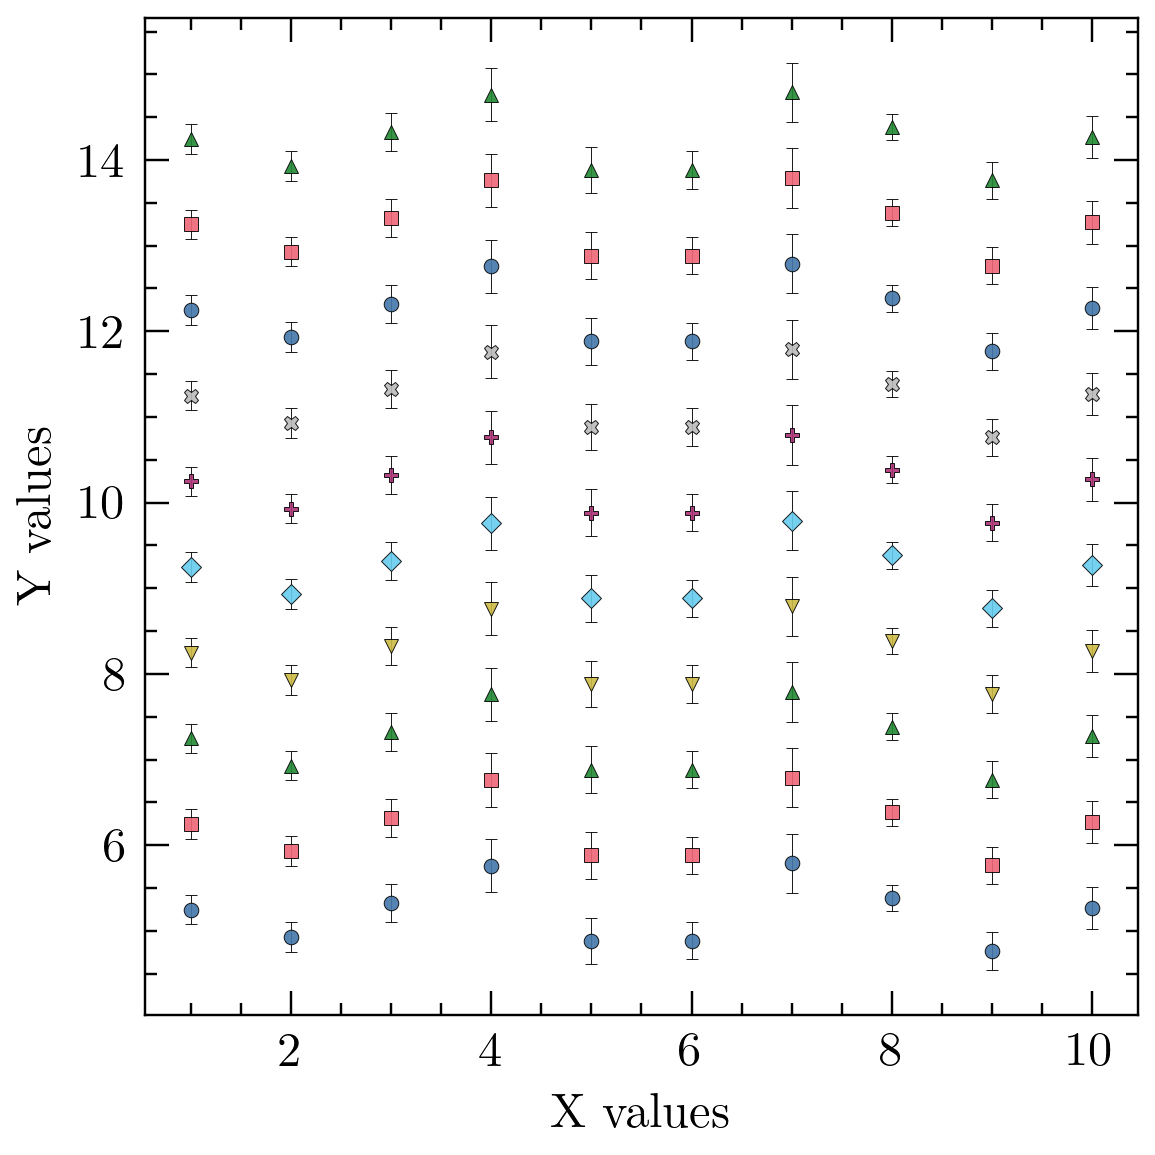

In [5]:
import numpy as np

# Generate fake data
np.random.seed(42)
x = np.linspace(1, 10, 10)
y1 = np.random.normal(5, 0.5, size=len(x))
# Errors
yerr1 = np.random.uniform(0.1, 0.5, size=len(x))

fig, ax = plt.subplots(dpi = 175)
# Plot the data with error bars and cycle marker shapes
for i in np.arange(10):
    ax.errorbar(x, y1+i, yerr=yerr1,**error_bar_settings)


# Add labels and legend
ax.set_xlabel('X values')
ax.set_ylabel('Y values')

# Show the plot
plt.tight_layout()
plt.show()

To see the matplotlib parameters run the following

In [6]:
plt.rcParams

RcParams({'_internal.classic_mode': False,
          'agg.path.chunksize': 0,
          'animation.bitrate': -1,
          'animation.codec': 'h264',
          'animation.convert_args': ['-layers', 'OptimizePlus'],
          'animation.convert_path': 'convert',
          'animation.embed_limit': 20.0,
          'animation.ffmpeg_args': [],
          'animation.ffmpeg_path': 'ffmpeg',
          'animation.frame_format': 'png',
          'animation.html': 'none',
          'animation.writer': 'ffmpeg',
          'axes.autolimit_mode': 'data',
          'axes.axisbelow': 'line',
          'axes.edgecolor': 'black',
          'axes.facecolor': 'white',
          'axes.formatter.limits': [-5, 6],
          'axes.formatter.min_exponent': 0,
          'axes.formatter.offset_threshold': 4,
          'axes.formatter.use_locale': False,
          'axes.formatter.use_mathtext': False,
          'axes.formatter.useoffset': True,
          'axes.grid': False,
          'axes.grid.axis': 'both',
   